In [1]:
#import library
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# import dataset lewat kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jonathanwiii","key":"93883db93c24411e400761c37ea66b7d"}'}

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d meetnaren/goodreads-best-books
!unzip goodreads-best-books.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images/5494.jpg  
  inflating: images/images/5495.jpg  
  inflating: images/images/5496.jpg  
  inflating: images/images/5497.jpg  
  inflating: images/images/5498.jpg  
  inflating: images/images/5499.jpg  
  inflating: images/images/55.jpg    
  inflating: images/images/550.jpg   
  inflating: images/images/5500.jpg  
  inflating: images/images/5501.jpg  
  inflating: images/images/5502.jpg  
  inflating: images/images/5503.jpg  
  inflating: images/images/5504.jpg  
  inflating: images/images/5505.jpg  
  inflating: images/images/5506.jpg  
  inflating: images/images/5507.jpg  
  inflating: images/images/5508.jpg  
  inflating: images/images/5509.jpg  
  inflating: images/images/551.jpg   
  inflating: images/images/5510.jpg  
  inflating: images/images/5511.jpg  
  inflating: images/images/5512.jpg  
  inflating: images/images/5513.jpg  
  inflating: images/images/5514.jpg  
  inflating: images/images/5515.jpg  

In [5]:
path = '/content/book_data.csv'

In [6]:
book = pd.read_csv(path)

# memilih 10k data pertama saja karena keterbatasan RAM

#read new_book

book.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [7]:
path_2 = 'https://raw.githubusercontent.com/hanszebua/RNM-FOOTBALL/main/BookDataLebihLengkap.csv'
path_3 = 'https://raw.githubusercontent.com/hanszebua/RNM-FOOTBALL/main/BookDataLebihLengkapv2.csv'

In [8]:
# user_profile = pd.read_csv(path_3, sep=';', encoding='cp1252')

user_profile = pd.read_csv(path_2, sep=';')


# user_profile = user_profile.drop(df.index[35:39])

user_profile

,Name (Original Title),Author,Genre,book_desc
0,Kafka on the Shore,Haruki Murakami,"Fiction, Magical Realism, Fantasy, Japan, Japa...","Kafka on the Shore, a tour de force of metaphy..."
1,Stardust,Neil Gaiman,"Fantasy, Fiction, Romance, Young Adult, Advent...",Young Tristran Thorn will do anything to win t...
2,Lusifer! Lusifer!,Venerdi Handoyo,"Fiction, Indonesian Literature, Novels,Contemp...",That night a lot of things that shouldn't have...
3,The Stranger,Albert Camus,"Classics,Fiction, Philosophy, France, Literatu...",Published in 1942 by French author Albert Camu...
4,Five weeks in a Balloon,Jules Verne,"Classics,Fiction, Adventure, Science Fiction, ...",There was a large audience assembled on the 14...
5,Jakarta Before Morning,Ziggy Zesyazeoviennazabrizkie,"Fiction, Romance, Young Adult, Novels, Indones...","“Three in the morning, a sweater, and a dark, ..."
6,The Decline and Fall of Our Local Mosque,A.A. Navis,"Indonesian Literature, Fiction, Short Stories,...","In the short story ""Robohnya Sarau Kami"", God ..."
7,Sphere,Michael Crichton,"Science Fiction, Fiction, Thriller, Horror, My...","In the middle of the South Pacific, a thousand..."
8,Dome,Ahmad Tohari,"Novels, Indonesian Literature, Fiction, Histor...",It is not easy for a man to regain his place i...
9,A Road with no End,Mochtar Lubis,"Indonesian Literature, Novels, Classics, Liter...",Jakarta during the months following the Procla...


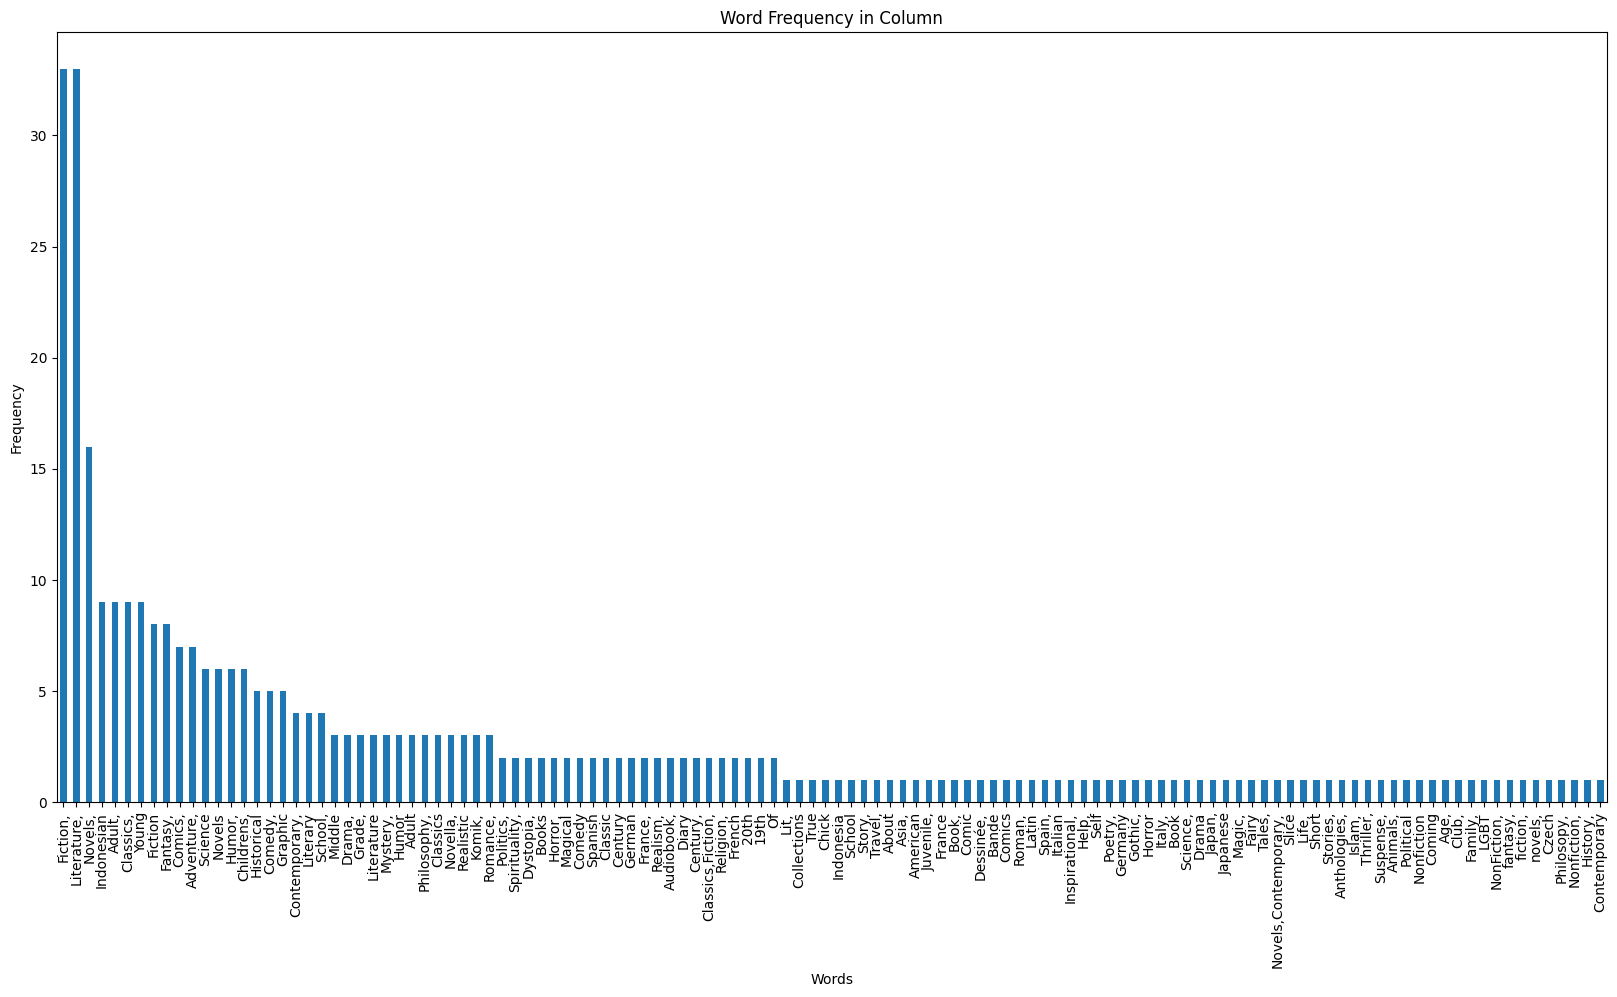

In [9]:
import matplotlib.pyplot as plt

column_data = user_profile['Genre']
word_counts = column_data.str.split(expand=True).stack().value_counts()

plt.figure(figsize=(20, 10))  # Adjust the figure size as desired
word_counts.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Column')
plt.show()

In [10]:
top_words = word_counts.head(30)
top_words

Fiction,         33
Literature,      33
Novels,          16
Indonesian        9
Adult,            9
Classics,         9
Young             9
Fiction           8
Fantasy,          8
Comics,           7
Adventure,        7
Science           6
Novels            6
Humor,            6
Childrens,        6
Historical        5
Comedy,           5
Graphic           5
Contemporary,     4
Literary          4
School,           4
Middle            3
Drama,            3
Grade,            3
Literature        3
Mystery,          3
Humor             3
Adult             3
Philosophy,       3
Classics          3
dtype: int64

# Data Pre-Processing

In [11]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# tfidf berperan untuk men-convert data yang akan dijadikan landasan rekomendasi menjadi value numerik

# mengisi data yang kosong dengan '' agar tfidvectorizer bisa bekerja dengan benar
book['book_authors'] = book['book_authors'].fillna('')
book['book_desc'] = book['book_desc'].fillna('')
book['genres'] = book['genres'].fillna('')

# memilih fitur-fitur yang akan digunakan menjadi acuan dalam merekomendasikan
features =  book['book_authors'] + ' ' + book['book_desc'] + ' ' + book['genres']

In [13]:
import numpy as np

#tokenize features
tokenized_features = [text.split() for text in features]

# train model pakai features
word2vec_model = Word2Vec(tokenized_features, vector_size=100, window=5, min_count=1, workers=4)

# membentuk vektor utk feature
features_vectors = np.zeros((len(features), word2vec_model.vector_size))

# looping tiap text di features
for i, text in enumerate(tokenized_features):
    for word in text: # looping tiap kata di tiap text
        if word in word2vec_model.wv: # kalau ada di vocabulary yg udah dipelajarin word2vec
            features_vectors[i] += word2vec_model.wv[word] # masukkin ke vector

In [14]:
# mengisi data yang kosong dengan '' agar tfidvectorizer bisa bekerja dengan benar
user_profile['Name (Original Title)'] = user_profile['Name (Original Title)'].fillna('')
user_profile['Author'] = user_profile['Author'].fillna('')
user_profile['book_desc'] = user_profile['book_desc'].fillna('')
user_profile['Genre'] = user_profile['Genre'].fillna('')

# memilih fitur-fitur yang akan digunakan menjadi acuan dalam merekomendasikan
features_user_profile =  user_profile['Name (Original Title)'] + ' ' + user_profile['Author'] + ' ' + user_profile['book_desc'] + ' ' + user_profile['Genre']

In [15]:
#tokenize user profile
tokenized_user_profile = [text.split() for text in features_user_profile]

# membentuk vektor utk user profile
user_profile_vector = np.zeros(word2vec_model.vector_size)

# looping tiap text di user profile
for text in tokenized_user_profile:
    for word in text: # looping tiap kata di tiap text
        if word in word2vec_model.wv: # kalau ada di vocabulary yg udah dipelajarin word2vec
            user_profile_vector += word2vec_model.wv[word] # masukkin ke vector

In [16]:
import numpy as np

# Membuat numpy array yang akan menampung similarity score tiap buku di user profile terhadap dataset
combined_scores = np.zeros(features_vectors.shape[0])

# looping user profile
for i in range(len(features_vectors)):
    profile_similarity = cosine_similarity(features_vectors[i].reshape(1, -1), user_profile_vector.reshape(1, -1))

    combined_scores[i] = profile_similarity[0][0]

# sort dari nilai tertinggi ke terendah dengan mengambil 200 pertama
top_indices = np.argsort(combined_scores)[-201:][::-1]

# Membuat dataframe berisi list rekomendasi
results = pd.DataFrame({
    'Book Title': [book['book_title'][i] for i in top_indices],
    'Author': [book['book_authors'][i] for i in top_indices],
    'Genre': [book['genres'][i] for i in top_indices],
    'Description': [book['book_desc'][i] for i in top_indices],
    'Similarity Score': [combined_scores[i] for i in top_indices]
})

results

,Book Title,Author,Genre,Description,Similarity Score
0,Dirty Havana Trilogy,Pedro Juan Gutiérrez|Natasha Wimmer,Fiction,"For the last four decades, Fidel Castro's comm...",0.997919
1,Mortal End: A Simmering Pit of Jiggery Pokery,Toula Mavridou-Messer|Jimmy Messer,Speculative Fiction|Mystery,Mortal End: A Simmering Pit of Jiggery Pokery ...,0.997495
2,Shrub: The Short but Happy Political Life of G...,Molly Ivins|Lou Dubose,Politics|Nonfiction|Biography|Humor|History,"When it comes to reporting on politics, nobody...",0.997415
3,Super Sad True Love Story,Gary Shteyngart,Fiction|Science Fiction|Dystopia|Science Ficti...,"The author of two critically acclaimed novels,...",0.997237
4,House of Leaves,Mark Z. Danielewski,Horror|Fiction|Fantasy|Mystery,This is an alternate cover edition - ISBN 10: ...,0.997179
...,...,...,...,...,...
196,Quarantine,Jim Crace,Fiction|Historical|Historical Fiction|Religion...,The story of Jesus's forty days in the wildern...,0.995076
197,If God Was a Banker,Ravi Subramanian,Fiction|Asian Literature|Indian Literature|Fin...,"In If God Was A Banker, the story revolves aro...",0.995075
198,It's Always Something,Gilda Radner,Biography|Autobiography|Memoir|Nonfiction|Humo...,"""I had wanted to wrap this book up in a neat l...",0.995071
199,The Man Who Was Thursday: A Nightmare,G.K. Chesterton|Jonathan Lethem,Fiction|Classics|Mystery|Fantasy|Literature|Ph...,G. K. Chesterton's surreal masterpiece is a ps...,0.995071


In [17]:
results.to_excel('book_suggestions_word2vecv2.xlsx', index=False)